In [2]:
import numpy as np
import myfunctions as mf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [19]:
def plot_data(df):
    plt.style.use('dark_background')
    plt.style.use('seaborn-v0_8-muted')
    time_axis = np.arange(len(np.unique(df['t'])))/20
    heigth = 3.5
    length = 4

    # VOLUME
    fig, axs = plt.subplots(1, 3, figsize=(3*length, heigth), facecolor='#282C34')
    fig.suptitle('Agglomerates volume vs time', y=1.05)

    sns.lineplot(ax=axs[0], data=df, x='t', y='V')
    axs[0].set_title('Whole battery')

    sns.lineplot(ax=axs[1], data=df, x='t', y='V', hue='r_sect')
    axs[1].set_title('$r$ sections')
    axs[1].legend(loc='lower right')

    sns.lineplot(ax=axs[2], data=df, x='t', y='V', hue='z_sect')
    axs[2].set_title('$z$ sections')
    axs[2].legend(loc='lower right')

    for ax in axs:
        ax.set_facecolor('#282C34')
        ax.set_xlabel('Time [$s$]')
        # ax.set_xlim(time_axis[0], time_axis[-1])
        _ = ax.set_ylabel('Volume [$m^3$]')

    # SPEED
    fig, axs = plt.subplots(1, 3, figsize=(3*length, heigth), facecolor='#282C34')
    fig.suptitle('Agglomerates speed vs time', y=1.05)

    sns.lineplot(ax=axs[0], data=df, x='t', y='v')
    axs[0].set_title('Whole battery')

    sns.lineplot(ax=axs[1], data=df, x='t', y='v', hue='r_sect')
    axs[1].set_title('$r$ sections')
    axs[1].legend(loc='lower right')

    sns.lineplot(ax=axs[2], data=df, x='t', y='v', hue='z_sect')
    axs[2].set_title('$z$ sections')
    axs[2].legend(loc='lower right')

    for ax in axs:
        ax.set_facecolor('#282C34')
        ax.set_xlabel('Time [$s$]')
        # ax.set_xlim(time_axis[0], time_axis[-1])
        _ = ax.set_ylabel('Speed [$m/s$]')

    # EXPANSION RATE
    fig, axs = plt.subplots(1, 3, figsize=(3*length, heigth), facecolor='#282C34')
    fig.suptitle('Agglomerates volume expansion rate vs time', y=1.05)

    sns.lineplot(ax=axs[0], data=df, x='t', y='dVdt')
    axs[0].set_title('Whole battery')

    sns.lineplot(ax=axs[1], data=df, x='t', y='dVdt', hue='r_sect')
    axs[1].set_title('$r$ sections')
    axs[1].legend(loc='lower right')

    sns.lineplot(ax=axs[2], data=df, x='t', y='dVdt', hue='z_sect')
    axs[2].set_title('$z$ sections')
    axs[2].legend(loc='lower right')

    for ax in axs:
        ax.set_facecolor('#282C34')
        ax.set_xlabel('Time [$s$]')
        # ax.set_xlim(time_axis[0], time_axis[-1])
        _ = ax.set_ylabel('Volume expansion rate [$m^3/s$]')

    # DENSITY
    fig, axs = plt.subplots(1, 2, figsize=(2*length, heigth), facecolor='#282C34')
    fig.suptitle('Agglomerates density vs time', y=1.05)

    agg_number_r = pd.DataFrame(columns=['Time', 'Number', 'r_sect'])
    agg_number_z = pd.DataFrame(columns=['Time', 'Number', 'z_sect'])
    r_sect_list = ['Core', 'Intermediate', 'External']
    z_sect_list = ['Top', 'Middle', 'Bottom']
    for t in (np.unique(df['t'])):
        for r, z in zip(r_sect_list, z_sect_list):
            agg_number_r = pd.concat([agg_number_r, pd.DataFrame([[t, 0, r]], columns=['Time', 'Number', 'r_sect'])], ignore_index=True)
            agg_number_z = pd.concat([agg_number_z, pd.DataFrame([[t, 0, z]], columns=['Time', 'Number', 'z_sect'])], ignore_index=True)
    for i in range(len(df)):
        agg_number_r.loc[(agg_number_r['Time'] == df['t'][i]) & (agg_number_r['r_sect'] == df['r_sect'][i]), 'Number'] += 1
        agg_number_z.loc[(agg_number_z['Time'] == df['t'][i]) & (agg_number_z['z_sect'] == df['z_sect'][i]), 'Number'] += 1

    agg_number_r.loc[agg_number_r['r_sect'] == 'Intermediate', 'Number'] = agg_number_r.loc[agg_number_r['r_sect'] == 'Intermediate', 'Number'] / 3
    agg_number_r.loc[agg_number_r['r_sect'] == 'External', 'Number'] = agg_number_r.loc[agg_number_r['r_sect'] == 'External', 'Number'] / 5

    sns.lineplot(ax=axs[0], data=agg_number_r, x='Time', y='Number', hue='r_sect')
    axs[0].set_title('$r$ sections')

    sns.lineplot(ax=axs[1], data=agg_number_z, x='Time', y='Number', hue='z_sect')
    axs[1].set_title('$z$ sections')

    for ax in axs:
        ax.set_facecolor('#282C34')
        ax.set_xlabel('Time [$s$]')
        ax.set_xlim(time_axis[0], time_axis[-1])
        _ = ax.set_ylabel('Agglomerate density [a.u.]')
    return None

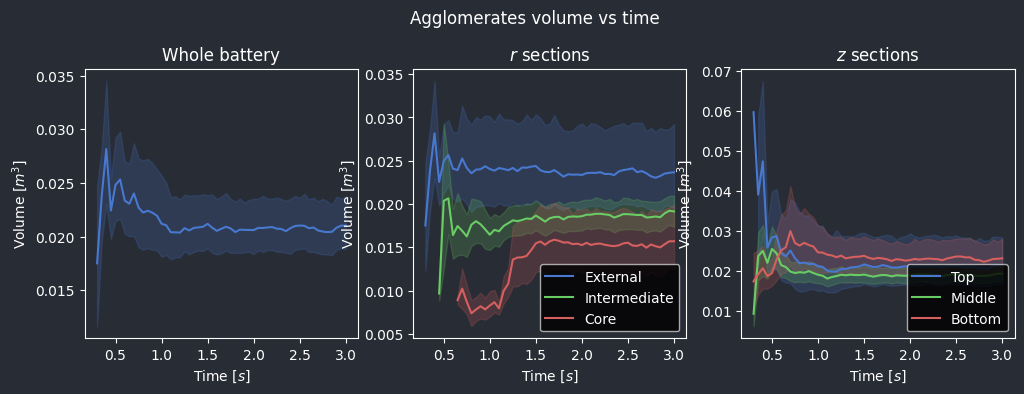

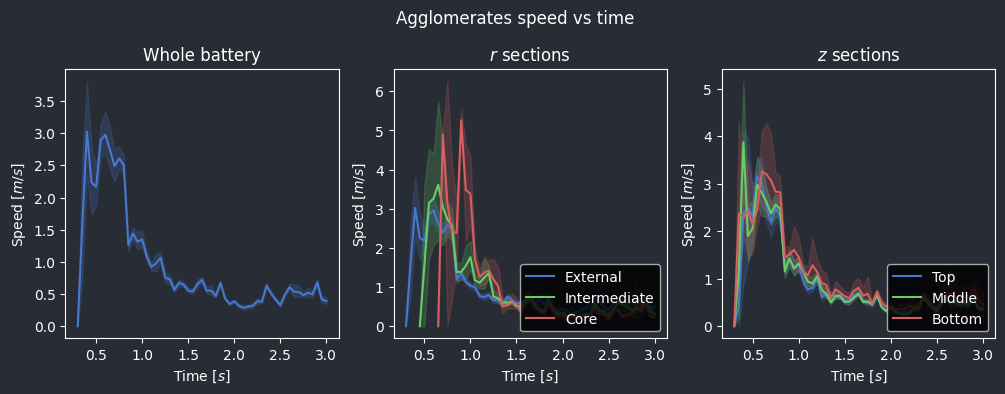

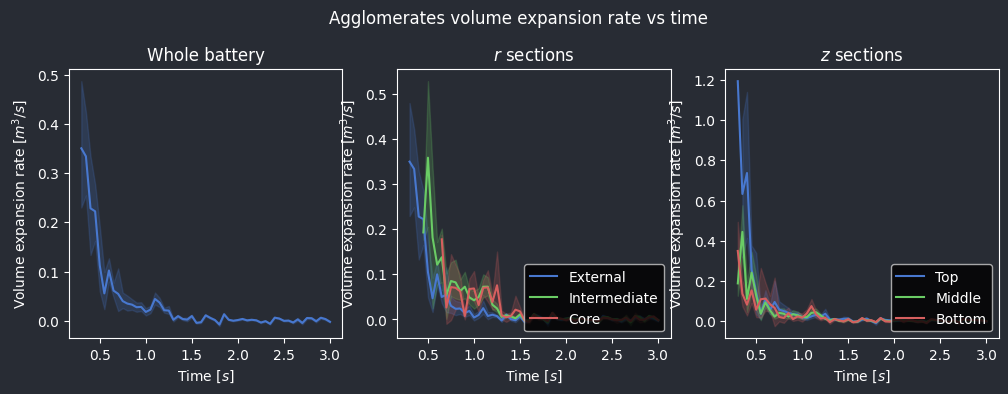

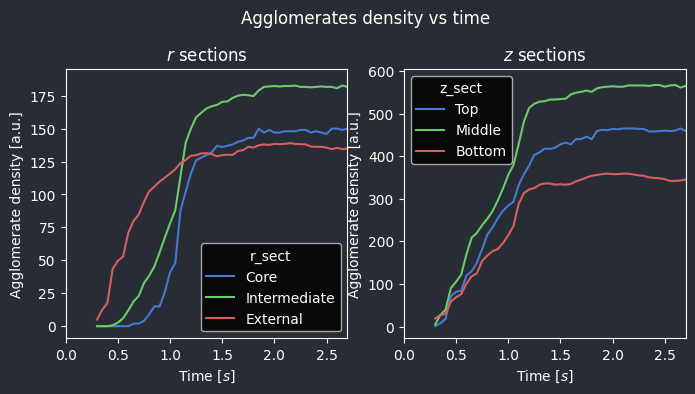

In [20]:
OS = 'MacOS'
exp = mf.exp_list()[1]

df = pd.read_csv(os.path.join(mf.OS_path(exp, OS), 'motion_properties.csv'))

plot_data(df)